# SVM (Support Vector Machine)
![WhatsApp Image 2023-06-25 at 21.32.42.jpg](<attachment:WhatsApp Image 2023-06-25 at 21.32.42.jpg>)

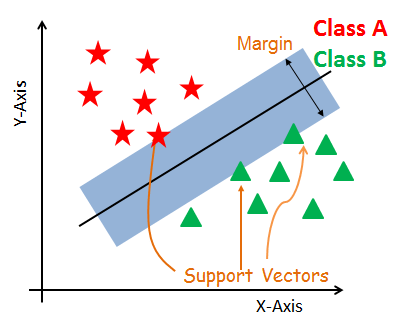


Support vector machines (SVMs) are a set of supervised learning methods used for classification, regression and outliers detection.

The advantages of support vector machines are:

Effective in high dimensional spaces.

Still effective in cases where number of dimensions is greater than the number of samples.

Uses a subset of training points in the decision function (called support vectors), so it is also memory efficient.

Versatile: different Kernel functions can be specified for the decision function. Common kernels are provided, but it is also possible to specify custom kernels.

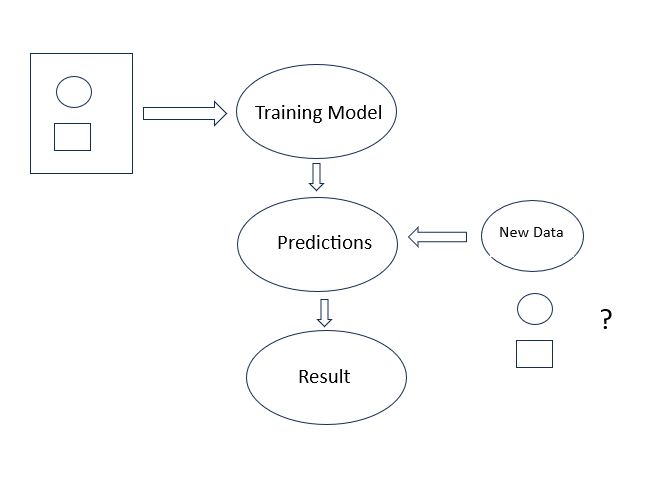

### importing the modules

In [1]:
import numpy as np
import pandas as pd
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn import metrics


### loading the datasets

In [2]:
cancer =  datasets.load_breast_cancer()

### data exploration

In [3]:
print("Features : ",cancer.feature_names)

# 0 - malignant and 1 - benign
print("\nLabels : ",cancer.target_names)

Features :  ['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']

Labels :  ['malignant' 'benign']


In [4]:
cancer.data.shape

(569, 30)

### taking only the required datsets

In [5]:
print(cancer.data[:5])

[[1.799e+01 1.038e+01 1.228e+02 1.001e+03 1.184e-01 2.776e-01 3.001e-01
  1.471e-01 2.419e-01 7.871e-02 1.095e+00 9.053e-01 8.589e+00 1.534e+02
  6.399e-03 4.904e-02 5.373e-02 1.587e-02 3.003e-02 6.193e-03 2.538e+01
  1.733e+01 1.846e+02 2.019e+03 1.622e-01 6.656e-01 7.119e-01 2.654e-01
  4.601e-01 1.189e-01]
 [2.057e+01 1.777e+01 1.329e+02 1.326e+03 8.474e-02 7.864e-02 8.690e-02
  7.017e-02 1.812e-01 5.667e-02 5.435e-01 7.339e-01 3.398e+00 7.408e+01
  5.225e-03 1.308e-02 1.860e-02 1.340e-02 1.389e-02 3.532e-03 2.499e+01
  2.341e+01 1.588e+02 1.956e+03 1.238e-01 1.866e-01 2.416e-01 1.860e-01
  2.750e-01 8.902e-02]
 [1.969e+01 2.125e+01 1.300e+02 1.203e+03 1.096e-01 1.599e-01 1.974e-01
  1.279e-01 2.069e-01 5.999e-02 7.456e-01 7.869e-01 4.585e+00 9.403e+01
  6.150e-03 4.006e-02 3.832e-02 2.058e-02 2.250e-02 4.571e-03 2.357e+01
  2.553e+01 1.525e+02 1.709e+03 1.444e-01 4.245e-01 4.504e-01 2.430e-01
  3.613e-01 8.758e-02]
 [1.142e+01 2.038e+01 7.758e+01 3.861e+02 1.425e-01 2.839e-01 2.414

### setting the target data

In [6]:
print("1 - benign \t  0 - malignat\n")
print(cancer.target)

1 - benign 	  0 - malignat

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 0 0 1 0 0 1 1 1 1 0 1 0 0 1 1 1 1 0 1 0 0
 1 0 1 0 0 1 1 1 0 0 1 0 0 0 1 1 1 0 1 1 0 0 1 1 1 0 0 1 1 1 1 0 1 1 0 1 1
 1 1 1 1 1 1 0 0 0 1 0 0 1 1 1 0 0 1 0 1 0 0 1 0 0 1 1 0 1 1 0 1 1 1 1 0 1
 1 1 1 1 1 1 1 1 0 1 1 1 1 0 0 1 0 1 1 0 0 1 1 0 0 1 1 1 1 0 1 1 0 0 0 1 0
 1 0 1 1 1 0 1 1 0 0 1 0 0 0 0 1 0 0 0 1 0 1 0 1 1 0 1 0 0 0 0 1 1 0 0 1 1
 1 0 1 1 1 1 1 0 0 1 1 0 1 1 0 0 1 0 1 1 1 1 0 1 1 1 1 1 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 1 1 1 1 1 0 1 0 1 1 0 1 1 0 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1
 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 0 1 1 1 1 0 0 0 1 1
 1 1 0 1 0 1 0 1 1 1 0 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 0 0 1 0 0
 0 1 0 0 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 0 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1
 1 0 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 0 1 0 1 1 1 1 1 0 1 1
 0 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0

### splitting the datasets

In [8]:
X_train, X_test,y_train,y_test = train_test_split(cancer.data,cancer.target,test_size=0.3,random_state=109)

### generating the model


In [9]:
clf = svm.SVC(kernel='linear')

clf.fit(X_train,y_train)


SVC(kernel='linear')

### Prediction

In [11]:
y_pred = clf.predict(X_test)

###  Evaluation of model

In [13]:
print("accuracy  : ",metrics.accuracy_score(y_test,y_pred))

accuracy  :  0.9649122807017544


### SVM with Visualization

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns; sns.set()
from sklearn.datasets._samples_generator import make_blobs
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split


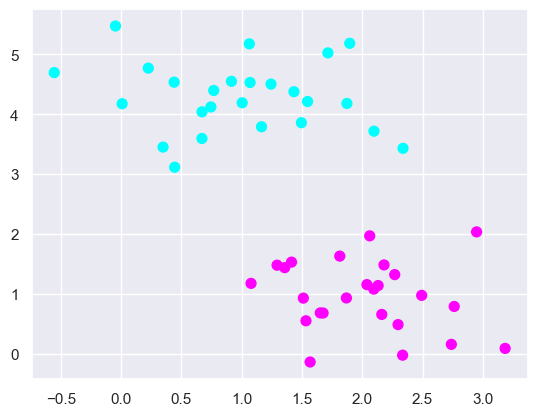

In [22]:
X,y = make_blobs(n_samples=50,centers=2,
                 random_state=0,cluster_std=0.60)
plt.scatter(X[:,0],X[:,1],c=y,s=50,cmap='cool')

In [17]:
X_train, X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=30)
model = SVC(kernel='linear',C=1)
model.fit(X,y)

y_pred=model.predict(X_test)

In [19]:
def plot_Svm(model,ax=None,plot_support=True):
    if ax is None:
        ax = plt.gca()
    xlim=ax.get_xlim()
    ylim=ax.get_ylim()

    x = np.linspace(xlim[0],xlim[1],30)
    
    y = np.linspace(ylim[0],ylim[1],30)

    Y, X = np.meshgrid(y,x)
    xy = np.vstack([X.ravel(),Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)

    ax.contour(X,Y,P,colors='red',
               levels=[-1,0,1],alpha=0.5,
               linestyles=['--','-','--'])
    
    """if plot_support:
        ax.scatter(model.support_vectors[:,0],
                   model.support_vectors[:,1],
                   s=300,linewidth=1,facecolors='None');"""

    ax.set_xlim(xlim)
    ax.set_ylim(ylim)
    

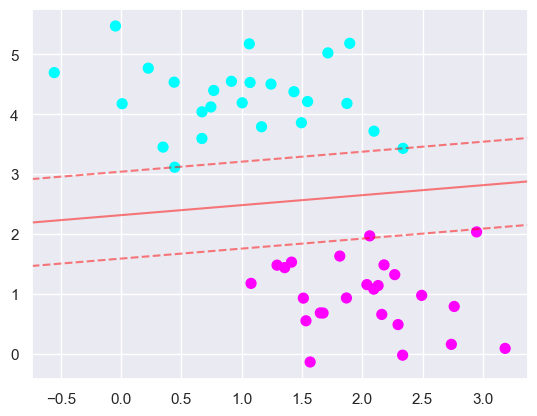

In [23]:
plt.scatter(X[:,0],X[:,1],c=y,s=50,cmap='cool')
plot_Svm(model)

In [27]:
print("Accuracy :",metrics.accuracy_score(y_test,y_pred))

Accuracy : 1.0
